In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display

## Filter data

In [38]:
def filter_data(data_sent):
    data = data_sent.copy()
    max_flux = -12
    min_flux = 26
    data = data[data['flux_aper']<max_flux]

    data = data[data['significance']>2]
    data_class = data[['class']]

    data_sig = data['significance']
    data_id = data['src_id']
    data_name = data['src_n']
    obs_info_params = [ 'livetime','likelihood','pileup_flag','mstr_sat_src_flag','mstr_streak_src_flag'   ,'gti_obs' , 'flux_significance_b'  , 'flux_significance_m' , 'flux_significance_s' , 'flux_significance_h' , 'flux_significance_u'    ]
    data_val = data.drop(columns=obs_info_params).reset_index(drop=True)
    return data_val

def norm_data(data_sent):
    data = data_sent.copy()
    #data.replace()
    for d in data:
        max_val = np.amax(data[d])
        min_val =  np.amin(data[d])
        data[d] = (data[d]-min_val)/(max_val-min_val)
    return data
def std_data(data_sent):
    data = data_sent.copy()
    for d in data:
        mean =  np.mean(data[d])
        std = np.sqrt(np.var(data[d]))
        data[d] = (data[d]-mean)/std 
    return data
def do_nothing(data_sent):
    return data_sent

In [53]:
def extract_data(data_sent , impute_fn = '',reduce_fn = ' ' , rf_impute=False):
    data = data_sent.copy()
    data = data.sample(frac=1)
    data = filter_data(data)
    #display(data)
    data_id = data[['class' , 'obs_id', 'src_n' , 'src_id' ,'significance' ,]]
    data_id = data_id.reset_index(drop=True)
    data_val = data.drop(['index' , 'class' , 'obs_id' ,'src_n' , 'src_id' ,'significance'] , axis=1)
    data_val = reduce_fn(data_val)
    return data_val , data_id
    #if(rf_impute):
    #    data_val  , random_forest_imputer = impute_fn(data_val , data_id)
    #else:
    #    data_val = impute_fn(data_val)
    data_val = reduce_fn(data_val)
    data_val = data_val.reset_index(drop=True)
    data_reduced = pd.concat([data_id , data_val] , axis=1)
    if(rf_impute):
        return(data_reduced , random_forest_imputer)
    else:
        return data_reduced

## Load data

In [54]:

train_bh = pd.read_csv('../processed_data/BH_.csv')
train_bh = train_bh.sample(frac=1)

train_ns = pd.read_csv('../processed_data/NS_.csv' )
train_ns = train_ns.sample(frac=1)

train = pd.concat([train_bh , train_ns ] , axis=0)
train =  train.sample(frac=1).reset_index(drop=True)

#train = train.drop(['flux_brems_lolim' , 'flux_brems' , 'brems_kt' , 'brems_kt_hilim' , 'brems_nh_lolim' , 'brems_kt_lolim' , 'flux_brems_hilim' , 'brems_nh' , 'brems_nh_lolim' , 'brems_nh_hilim'] , axis =1)


# RF imputer

In [25]:
from MissingValuesHandler.missing_data_handler import RandomForestImputer

In [58]:
def rf_impute(d, i ):
    data = pd.concat([i , d] , axis=1)
    data = data.drop(columns=['src_n' , 'src_id' , 'significance'])
    rf_imputer = RandomForestImputer(
        data=data , 
        target_variable_name='class' , 
        forbidden_features_list=[] , 
        
    )
    rf_imputer.set_ensemble_model_parameters(n_estimators=500 , additional_estimators=100)
    new_data =  rf_imputer.train(sample_size = 0, path_to_save_dataset='processed_data/rf_imp.csv')
    new_data = new_data.drop(columns= ['class'])
    return new_data , rf_imputer

In [59]:
data_val , data_id   = extract_data(train ,  impute_fn= rf_impute , reduce_fn= do_nothing , rf_impute=True )

In [60]:

new_data , random_forest_imputer = rf_impute(data_val, data_id)
new_data = std_data(new_data)
#train_data.index.name = 'index'
#display(train_data.describe())
#train_data.to_csv('../processed_data/train_norm_rf_impute')



- 15907 VALUE(S) CONVERGED!
- 3655 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 15922 VALUE(S) CONVERGED!
- 3640 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 15950 VALUE(S) CONVERGED!
- 3612 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 17325 VALUE(S) CONVERGED!
- 2237 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 18736 VALUE(S) CONVERGED!
- 826 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19028 VALUE(S) CONVERGED!
- 534 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19264 VALUE(S) CONVERGED!
- 298 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19342 VALUE(S) CONVERGED!
- 220 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19391 VALUE(S) CONVERGED!
- 171 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19416 VALUE(S) CONVERGED!
- 146 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19455 VALUE(S) CONVERGED!
- 107 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19466 VALUE(S) CONVERGED!
- 96 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19476 VALUE(S) CONVERGED!
- 86 VALUE(S) REMAINING!
- NOT EVERY VALUE CONVERGED. ONTO THE NEXT ROUND OF ITERATIONS...





- 19476 VALUE(S) CONVERGED!
- 86 VALUE(S) REMAINING!
- 86/19562 VALUES UNABLE TO CONVERGE. THE MEDIAN AND/OR THE MODE HAVE BEEN USED AS A REPLACEMENT

- TOTAL ITERATIONS: 70

- NEW DATASET SAVED in: processed_data/rf_imp.csv


TypeError: Could not convert BH_OBS_189NS_OBS_94NS_OBS_108NS_OBS_41NS_OBS_132BH_OBS_86BH_OBS_65NS_OBS_367BH_OBS_35BH_OBS_116NS_OBS_222NS_OBS_407NS_OBS_169BH_OBS_148BH_OBS_18NS_OBS_136NS_OBS_436NS_OBS_173NS_OBS_429BH_OBS_47NS_OBS_324NS_OBS_353NS_OBS_97NS_OBS_210NS_OBS_394NS_OBS_193BH_OBS_97NS_OBS_211NS_OBS_206NS_OBS_142NS_OBS_261NS_OBS_9NS_OBS_330NS_OBS_423NS_OBS_77NS_OBS_200NS_OBS_174NS_OBS_134BH_OBS_87BH_OBS_192NS_OBS_323BH_OBS_90BH_OBS_13NS_OBS_198NS_OBS_310NS_OBS_349BH_OBS_77NS_OBS_11NS_OBS_93BH_OBS_138BH_OBS_51NS_OBS_345BH_OBS_108BH_OBS_53NS_OBS_325NS_OBS_124NS_OBS_244BH_OBS_145NS_OBS_204NS_OBS_116NS_OBS_149NS_OBS_415NS_OBS_207NS_OBS_23NS_OBS_138NS_OBS_95NS_OBS_329NS_OBS_403BH_OBS_122BH_OBS_101BH_OBS_40NS_OBS_152NS_OBS_194BH_OBS_149NS_OBS_304BH_OBS_135NS_OBS_24NS_OBS_414NS_OBS_234NS_OBS_106NS_OBS_380BH_OBS_85BH_OBS_141BH_OBS_160NS_OBS_400NS_OBS_216NS_OBS_235NS_OBS_115NS_OBS_275NS_OBS_74NS_OBS_188BH_OBS_112BH_OBS_96NS_OBS_181NS_OBS_359NS_OBS_63NS_OBS_319BH_OBS_100BH_OBS_144BH_OBS_28NS_OBS_406NS_OBS_48NS_OBS_241BH_OBS_61NS_OBS_384NS_OBS_196BH_OBS_63NS_OBS_433BH_OBS_83BH_OBS_98NS_OBS_90BH_OBS_198BH_OBS_125BH_OBS_139BH_OBS_121NS_OBS_121NS_OBS_191NS_OBS_220BH_OBS_70BH_OBS_117NS_OBS_405NS_OBS_71NS_OBS_170BH_OBS_195BH_OBS_168NS_OBS_140NS_OBS_364NS_OBS_91BH_OBS_14BH_OBS_59NS_OBS_203NS_OBS_352NS_OBS_245NS_OBS_254NS_OBS_404BH_OBS_99BH_OBS_66NS_OBS_105BH_OBS_52NS_OBS_360NS_OBS_289BH_OBS_147BH_OBS_187NS_OBS_40NS_OBS_389NS_OBS_243NS_OBS_401NS_OBS_432BH_OBS_103BH_OBS_124NS_OBS_212NS_OBS_226NS_OBS_422NS_OBS_113NS_OBS_331NS_OBS_424NS_OBS_89BH_OBS_50NS_OBS_356NS_OBS_371NS_OBS_45BH_OBS_161NS_OBS_246BH_OBS_142NS_OBS_92BH_OBS_94NS_OBS_219NS_OBS_99NS_OBS_326BH_OBS_111BH_OBS_1NS_OBS_346NS_OBS_428BH_OBS_173NS_OBS_233NS_OBS_427NS_OBS_281NS_OBS_327NS_OBS_257NS_OBS_413NS_OBS_340NS_OBS_273NS_OBS_176NS_OBS_358NS_OBS_417NS_OBS_395BH_OBS_186NS_OBS_118BH_OBS_154NS_OBS_420BH_OBS_95BH_OBS_71NS_OBS_158BH_OBS_33NS_OBS_168NS_OBS_229BH_OBS_106BH_OBS_155BH_OBS_84BH_OBS_62BH_OBS_134NS_OBS_214NS_OBS_228NS_OBS_148NS_OBS_318NS_OBS_155BH_OBS_45BH_OBS_123NS_OBS_81BH_OBS_129NS_OBS_177NS_OBS_242BH_OBS_55NS_OBS_387NS_OBS_123NS_OBS_337BH_OBS_38NS_OBS_88BH_OBS_75NS_OBS_80BH_OBS_92BH_OBS_80BH_OBS_89NS_OBS_85BH_OBS_30NS_OBS_130NS_OBS_363BH_OBS_36NS_OBS_354NS_OBS_129BH_OBS_78NS_OBS_309NS_OBS_397NS_OBS_209NS_OBS_205NS_OBS_348NS_OBS_311NS_OBS_385NS_OBS_332NS_OBS_338BH_OBS_143BH_OBS_68NS_OBS_412BH_OBS_37BH_OBS_115NS_OBS_392NS_OBS_187NS_OBS_127BH_OBS_140NS_OBS_341BH_OBS_105NS_OBS_240NS_OBS_190BH_OBS_31NS_OBS_335BH_OBS_81NS_OBS_183BH_OBS_67NS_OBS_150NS_OBS_218BH_OBS_49NS_OBS_237BH_OBS_107NS_OBS_438NS_OBS_370NS_OBS_171NS_OBS_125BH_OBS_128NS_OBS_355BH_OBS_170NS_OBS_253BH_OBS_165NS_OBS_114NS_OBS_431NS_OBS_186NS_OBS_408NS_OBS_430NS_OBS_151BH_OBS_76NS_OBS_86NS_OBS_178BH_OBS_27NS_OBS_434BH_OBS_130NS_OBS_144BH_OBS_110NS_OBS_103BH_OBS_17NS_OBS_313NS_OBS_82NS_OBS_376NS_OBS_265BH_OBS_43NS_OBS_230NS_OBS_347NS_OBS_320NS_OBS_50NS_OBS_393NS_OBS_418BH_OBS_91NS_OBS_425NS_OBS_135NS_OBS_379NS_OBS_350BH_OBS_169NS_OBS_7BH_OBS_193BH_OBS_137NS_OBS_217NS_OBS_288NS_OBS_75BH_OBS_163NS_OBS_175BH_OBS_11NS_OBS_285NS_OBS_227BH_OBS_151NS_OBS_255NS_OBS_316BH_OBS_131NS_OBS_83NS_OBS_388BH_OBS_127NS_OBS_369NS_OBS_192NS_OBS_166NS_OBS_38BH_OBS_109BH_OBS_19BH_OBS_72NS_OBS_342NS_OBS_224NS_OBS_374NS_OBS_76NS_OBS_421NS_OBS_159NS_OBS_163NS_OBS_312NS_OBS_416BH_OBS_126BH_OBS_118BH_OBS_44NS_OBS_368NS_OBS_172NS_OBS_398NS_OBS_238NS_OBS_402NS_OBS_143BH_OBS_157NS_OBS_315NS_OBS_269BH_OBS_119BH_OBS_73NS_OBS_167NS_OBS_344BH_OBS_12NS_OBS_156BH_OBS_102NS_OBS_419NS_OBS_231NS_OBS_208NS_OBS_236NS_OBS_84NS_OBS_334NS_OBS_390BH_OBS_74NS_OBS_351BH_OBS_29NS_OBS_426NS_OBS_396BH_OBS_164BH_OBS_153BH_OBS_82NS_OBS_357BH_OBS_15NS_OBS_409NS_OBS_202NS_OBS_225NS_OBS_277BH_OBS_0BH_OBS_64NS_OBS_145NS_OBS_439BH_OBS_34NS_OBS_308BH_OBS_113BH_OBS_146NS_OBS_131NS_OBS_180NS_OBS_184NS_OBS_283BH_OBS_166NS_OBS_165BH_OBS_132BH_OBS_39NS_OBS_8BH_OBS_136BH_OBS_120NS_OBS_189NS_OBS_307NS_OBS_223NS_OBS_399BH_OBS_114BH_OBS_79BH_OBS_16BH_OBS_2BH_OBS_133NS_OBS_42BH_OBS_184NS_OBS_52NS_OBS_160NS_OBS_157BH_OBS_167BH_OBS_10BH_OBS_104NS_OBS_362NS_OBS_339NS_OBS_336NS_OBS_73BH_OBS_159NS_OBS_372NS_OBS_79BH_OBS_174BH_OBS_185NS_OBS_133NS_OBS_258NS_OBS_36BH_OBS_46BH_OBS_93NS_OBS_378NS_OBS_179NS_OBS_373NS_OBS_128NS_OBS_377BH_OBS_32NS_OBS_139NS_OBS_195NS_OBS_239NS_OBS_366NS_OBS_122NS_OBS_383NS_OBS_232NS_OBS_328NS_OBS_126NS_OBS_197NS_OBS_185NS_OBS_87NS_OBS_51NS_OBS_297BH_OBS_69NS_OBS_137NS_OBS_141NS_OBS_321NS_OBS_282BH_OBS_188NS_OBS_201BH_OBS_48NS_OBS_182BH_OBS_194BH_OBS_88 to numeric

In [64]:
new_data = new_data.drop('obs_id' , axis=1)

In [72]:
new_data

,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_m,flux_aper_lolim_h,flux_aper_lolim_b,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,-14.000000,-13.000000,-15.477425,-13.000000,-15.576918,-14.000000,-14.000000,-16.982549,-14.000000,-13.000000,...,0.0,0.0,1.0,3.0,2.0,2.0,93.0,116.0,82.0,1.0
1,-14.978811,-13.000000,-14.211549,-13.968188,-13.795066,-15.310602,-14.000000,-14.346884,-14.165134,-13.905529,...,0.0,0.0,1.0,3.0,2.0,2.0,90.0,114.0,79.0,1.0
2,-13.547447,-13.922632,-14.778847,-12.866781,-12.834756,-15.160271,-14.000000,-14.000000,-13.271727,-13.212115,...,0.0,0.0,1.0,3.0,2.0,2.0,90.0,114.0,79.0,1.0
3,-15.137392,-13.000000,-15.122168,-14.590574,-14.592779,-14.000000,-14.000000,-14.000000,-15.932929,-15.935168,...,0.0,0.0,1.0,3.0,2.0,2.0,90.0,115.0,80.0,1.0
4,-13.905529,-13.000000,-13.950782,-13.410833,-13.257589,-14.102648,-14.000000,-14.172760,-13.649752,-13.383630,...,0.0,0.0,1.0,3.0,2.0,2.0,90.0,114.0,80.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,-14.620513,-13.285586,-14.554551,-14.057000,-14.569925,-14.000000,-14.000000,-14.000000,-14.000000,-13.000000,...,0.0,0.0,1.0,3.0,2.0,2.0,90.0,114.0,79.0,1.0
456,-15.485319,-15.898597,-14.000000,-15.680478,-15.522589,-16.097182,-14.000000,-14.000000,-14.000000,-13.000000,...,0.0,0.0,1.0,3.0,2.0,2.0,120.0,154.0,107.0,1.0
457,-13.616185,-13.148680,-13.996109,-14.005243,-13.452471,-14.049927,-14.000000,-14.465720,-15.272459,-13.747390,...,0.0,0.0,1.0,3.0,2.0,2.0,89.0,113.0,79.0,1.0
458,-15.250728,-14.000000,-15.758952,-15.096205,-15.212610,-15.834162,-14.000000,-14.000000,-14.000000,-13.000000,...,0.0,0.0,1.0,4.0,2.0,2.0,135.0,171.0,117.0,1.0


In [66]:
data_id

,class,obs_id,src_n,src_id,significance
0,BH,BH_OBS_189,SAXWFC J1819.4-2524.,BH0030,2.24
1,NS,NS_OBS_94,EXO 1745-248,NS0020,23.47
2,NS,NS_OBS_108,GRS 1741.9-2853,NS0021,376.06
3,NS,NS_OBS_41,1A 1742-289,NS0001,167.36
4,NS,NS_OBS_132,IGR J00291+5934,NS0028,18.99
...,...,...,...,...,...
455,NS,NS_OBS_201,XMMU J004245.2+41172,NS0044,49.26
456,BH,BH_OBS_48,CXOU J100506.7-07443,BH0014,11.41
457,NS,NS_OBS_182,XMMU J004245.2+41172,NS0044,49.26
458,BH,BH_OBS_194,GS 1354-645,BH0031,2.44


In [67]:
data_val

,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_m,flux_aper_lolim_h,flux_aper_lolim_b,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,NaN,NaN,-15.477425,NaN,-15.576918,NaN,NaN,-16.982549,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-14.978811,NaN,-14.211549,-13.968188,-13.795066,-15.310602,NaN,-14.346884,-14.165134,-13.905529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-13.547447,-13.922632,-14.778847,-12.866781,-12.834756,-15.160271,NaN,NaN,-13.271727,-13.212115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-15.137392,NaN,-15.122168,-14.590574,-14.592779,NaN,NaN,NaN,-15.932929,-15.935168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-13.905529,NaN,-13.950782,-13.410833,-13.257589,-14.102648,NaN,-14.172760,-13.649752,-13.383630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,-14.620513,-13.285586,-14.554551,-14.057000,-14.569925,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,-15.485319,-15.898597,NaN,-15.680478,-15.522589,-16.097182,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,-13.616185,-13.148680,-13.996109,-14.005243,-13.452471,-14.049927,NaN,-14.465720,-15.272459,-13.747390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,-15.250728,NaN,-15.758952,-15.096205,-15.212610,-15.834162,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
data_id

,class,obs_id,src_n,src_id,significance
0,NS,NS_OBS_170,XMMU J004245.2+41172,NS0044,49.26
1,BH,BH_OBS_97,CXOU J100516.5-07420,BH0021,16.75
2,BH,BH_OBS_66,CXOU J100514.2-07423,BH0018,16.29
3,NS,NS_OBS_309,XMMU J004245.2+41172,NS0046,4.71
4,BH,BH_OBS_168,J1745-2900,BH0027,337.00
...,...,...,...,...,...
455,BH,BH_OBS_139,J1745-2900,BH0027,337.00
456,NS,NS_OBS_404,SAXWFC J1748.1-2446.,NS0072,19.47
457,BH,BH_OBS_50,CXOU J100510.0-07452,BH0016,7.77
458,NS,NS_OBS_81,EXO 1745-248,NS0020,23.47


In [70]:
sample_used                         = random_forest_imputer.get_sample()
features_type_prediction            = random_forest_imputer.get_features_type_predictions()
target_variable_type_prediction     = random_forest_imputer.get_target_variable_type_prediction()
encoded_features                    = random_forest_imputer.get_encoded_features()
encoded_target_variable             = random_forest_imputer.get_target_variable_encoded()
final_proximity_matrix              = random_forest_imputer.get_proximity_matrix()
final_distance_matrix               = random_forest_imputer.get_distance_matrix()
weighted_averages                   = random_forest_imputer.get_nan_features_predictions(option="all")
convergent_values                   = random_forest_imputer.get_nan_features_predictions(option="conv")
divergent_values                    = random_forest_imputer.get_nan_features_predictions(option="div")
ensemble_model_parameters           = random_forest_imputer.get_ensemble_model_parameters()
all_target_value_predictions        = random_forest_imputer.get_nan_target_values_predictions(option="all")
target_value_predictions            = random_forest_imputer.get_nan_target_values_predictions(option="one")


In [75]:
encoded_features_norm = norm_data(encoded_features)
encoded_features.iloc[: ,:92]

,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_m,flux_aper_lolim_h,flux_aper_lolim_b,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,-14.000000,-13.000000,-15.477425,-13.000000,-15.576918,-14.000000,-14.000000,-16.982549,-14.000000,-13.000000,...,0.0,0.0,1.0,3.0,2.0,2.0,93.0,116.0,82.0,1.0
1,-14.978811,-13.000000,-14.211549,-13.968188,-13.795066,-15.310602,-14.000000,-14.346884,-14.165134,-13.905529,...,0.0,0.0,1.0,3.0,2.0,2.0,90.0,114.0,79.0,1.0
2,-13.547447,-13.922632,-14.778847,-12.866781,-12.834756,-15.160271,-14.000000,-14.000000,-13.271727,-13.212115,...,0.0,0.0,1.0,3.0,2.0,2.0,90.0,114.0,79.0,1.0
3,-15.137392,-13.000000,-15.122168,-14.590574,-14.592779,-14.000000,-14.000000,-14.000000,-15.932929,-15.935168,...,0.0,0.0,1.0,3.0,2.0,2.0,90.0,115.0,80.0,1.0
4,-13.905529,-13.000000,-13.950782,-13.410833,-13.257589,-14.102648,-14.000000,-14.172760,-13.649752,-13.383630,...,0.0,0.0,1.0,3.0,2.0,2.0,90.0,114.0,80.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,-14.620513,-13.285586,-14.554551,-14.057000,-14.569925,-14.000000,-14.000000,-14.000000,-14.000000,-13.000000,...,0.0,0.0,1.0,3.0,2.0,2.0,90.0,114.0,79.0,1.0
456,-15.485319,-15.898597,-14.000000,-15.680478,-15.522589,-16.097182,-14.000000,-14.000000,-14.000000,-13.000000,...,0.0,0.0,1.0,3.0,2.0,2.0,120.0,154.0,107.0,1.0
457,-13.616185,-13.148680,-13.996109,-14.005243,-13.452471,-14.049927,-14.000000,-14.465720,-15.272459,-13.747390,...,0.0,0.0,1.0,3.0,2.0,2.0,89.0,113.0,79.0,1.0
458,-15.250728,-14.000000,-15.758952,-15.096205,-15.212610,-15.834162,-14.000000,-14.000000,-14.000000,-13.000000,...,0.0,0.0,1.0,4.0,2.0,2.0,135.0,171.0,117.0,1.0


In [76]:
new_data

,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_m,flux_aper_lolim_h,flux_aper_lolim_b,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,-14.000000,-13.000000,-15.477425,-13.000000,-15.576918,-14.000000,-14.000000,-16.982549,-14.000000,-13.000000,...,0.0,0.0,1.0,3.0,2.0,2.0,93.0,116.0,82.0,1.0
1,-14.978811,-13.000000,-14.211549,-13.968188,-13.795066,-15.310602,-14.000000,-14.346884,-14.165134,-13.905529,...,0.0,0.0,1.0,3.0,2.0,2.0,90.0,114.0,79.0,1.0
2,-13.547447,-13.922632,-14.778847,-12.866781,-12.834756,-15.160271,-14.000000,-14.000000,-13.271727,-13.212115,...,0.0,0.0,1.0,3.0,2.0,2.0,90.0,114.0,79.0,1.0
3,-15.137392,-13.000000,-15.122168,-14.590574,-14.592779,-14.000000,-14.000000,-14.000000,-15.932929,-15.935168,...,0.0,0.0,1.0,3.0,2.0,2.0,90.0,115.0,80.0,1.0
4,-13.905529,-13.000000,-13.950782,-13.410833,-13.257589,-14.102648,-14.000000,-14.172760,-13.649752,-13.383630,...,0.0,0.0,1.0,3.0,2.0,2.0,90.0,114.0,80.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,-14.620513,-13.285586,-14.554551,-14.057000,-14.569925,-14.000000,-14.000000,-14.000000,-14.000000,-13.000000,...,0.0,0.0,1.0,3.0,2.0,2.0,90.0,114.0,79.0,1.0
456,-15.485319,-15.898597,-14.000000,-15.680478,-15.522589,-16.097182,-14.000000,-14.000000,-14.000000,-13.000000,...,0.0,0.0,1.0,3.0,2.0,2.0,120.0,154.0,107.0,1.0
457,-13.616185,-13.148680,-13.996109,-14.005243,-13.452471,-14.049927,-14.000000,-14.465720,-15.272459,-13.747390,...,0.0,0.0,1.0,3.0,2.0,2.0,89.0,113.0,79.0,1.0
458,-15.250728,-14.000000,-15.758952,-15.096205,-15.212610,-15.834162,-14.000000,-14.000000,-14.000000,-13.000000,...,0.0,0.0,1.0,4.0,2.0,2.0,135.0,171.0,117.0,1.0


In [35]:
encoded_features

,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_m,flux_aper_lolim_h,flux_aper_lolim_b,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,-15.157328,-13.000000,-14.696156,-14.849858,-14.483465,-15.767766,-14.0,-15.043687,-16.451979,-14.778586,...,0.0,0.0,1.0,3.0,2.0,2.0,67.0,84.0,59.0,1.0
1,-14.803824,-13.517555,-14.846795,-13.266402,-13.276216,-14.000000,-14.0,-14.000000,-13.724228,-13.740645,...,0.0,0.0,1.0,7.0,2.0,2.0,202.0,252.0,177.0,1.0
2,-14.071912,-13.350957,-14.719649,-13.697886,-13.697453,-14.611899,-14.0,-14.000000,-14.953115,-14.182567,...,0.0,0.0,1.0,3.0,2.0,2.0,65.0,81.0,57.0,1.0
3,-15.350860,-13.000000,-15.370285,-14.447089,-14.567993,-14.000000,-14.0,-14.000000,-14.000000,-13.000000,...,0.0,0.0,1.0,3.0,2.0,2.0,65.0,81.0,57.0,1.0
4,-15.821311,-15.081445,-15.516413,-15.090497,-15.650722,-14.000000,-14.0,-14.000000,-14.000000,-13.000000,...,0.0,0.0,1.0,3.0,2.0,2.0,66.0,82.0,58.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,-13.566710,-13.188224,-13.744245,-13.160459,-13.029281,-13.900319,-14.0,-14.079042,-13.594142,-13.233438,...,0.0,0.0,1.0,3.0,2.0,2.0,65.0,81.0,57.0,1.0
456,-14.200659,-13.000000,-13.997402,-13.691222,-13.517841,-14.000000,-14.0,-14.264721,-14.300509,-13.819014,...,0.0,0.0,1.0,3.0,2.0,2.0,65.0,81.0,57.0,1.0
457,-14.945387,-15.555643,-15.064140,-14.625435,-14.461301,-15.485452,-14.0,-15.933301,-14.000000,-14.873544,...,0.0,0.0,1.0,7.0,2.0,2.0,217.0,271.0,184.0,1.0
458,-15.962972,-13.000000,-15.124591,-13.745936,-13.757707,-14.000000,-14.0,-15.854182,-13.932185,-13.931443,...,0.0,0.0,1.0,3.0,2.0,2.0,65.0,81.0,57.0,1.0


In [77]:
processed_data_all = pd.concat([data_id , new_data] , axis=1)
processed_data_all.to_csv('../processed_data/train_none_rf_impute')

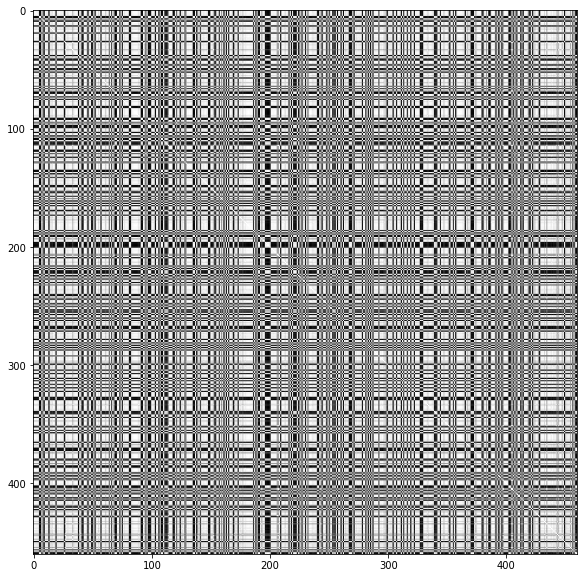

In [78]:
plt.figure(figsize=(12,10))
plt.imshow(
    final_proximity_matrix , 
    cmap='gray'
)
plt.show()

-(30, 'powlaw_nh') graph created
-(61, 'powlaw_nh') graph created
-(70, 'powlaw_nh') graph created
-(94, 'powlaw_nh') graph created
-(127, 'powlaw_nh') graph created
-(147, 'powlaw_nh') graph created
-(161, 'powlaw_nh') graph created
-(286, 'powlaw_nh') graph created
-(305, 'powlaw_nh') graph created
-(327, 'powlaw_nh') graph created
-(339, 'powlaw_nh') graph created
-(347, 'powlaw_nh') graph created
-(349, 'powlaw_nh') graph created
-(353, 'powlaw_nh') graph created
-(383, 'powlaw_nh') graph created
-(384, 'powlaw_nh') graph created
-(385, 'powlaw_nh') graph created
-(388, 'powlaw_nh') graph created
-(399, 'powlaw_nh') graph created
-(433, 'powlaw_nh') graph created
-(16, 'powlaw_nh_hilim') graph created
-(19, 'powlaw_nh_hilim') graph created
-(27, 'powlaw_nh_hilim') graph created
-(30, 'powlaw_nh_hilim') graph created
-(61, 'powlaw_nh_hilim') graph created
-(70, 'powlaw_nh_hilim') graph created
-(94, 'powlaw_nh_hilim') graph created
-(127, 'powlaw_nh_hilim') graph created
-(141, 'pow

KeyboardInterrupt: 

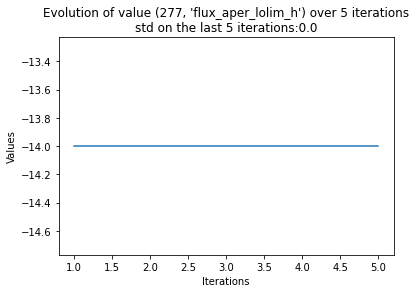

In [44]:
random_forest_imputer.create_weighted_averages_plots(directory_path="graphs", both_graphs=1)


In [155]:
random_forest_imputer.create_target_pred_plot(directory_path="target_graphs")

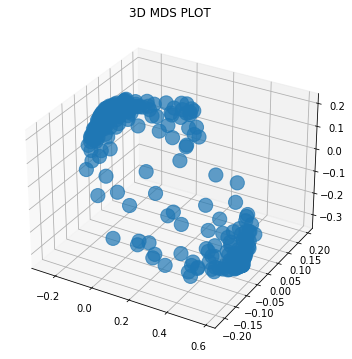

In [79]:
mds_coordinates = random_forest_imputer.get_mds_coordinates(n_dimensions=3, distance_matrix=final_distance_matrix)

random_forest_imputer.show_mds_plot(mds_coordinates, plot_type="3d")

In [22]:
mds_coordinates = random_forest_imputer.get_mds_coordinates(n_dimensions=3, distance_matrix=final_distance_matrix)
col = ['c'+str(i) for i in range(mds_coordinates.shape[1])]
print(col)
mds_df = pd.DataFrame(mds_coordinates , columns =col)
mds_df.insert(0 , 'class' , data_id['class'])
mds_df.index.name = 'index'
mds_df.to_csv('../processed_data/train_none_rf_impute')

['c0', 'c1', 'c2']


# Classification Score

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [177]:
acc_df = pd.DataFrame()
dim = [1 ,2 ,3 , 4 , 8 , 15 , 25 , 40 , 60 , 90]
for d in dim:
    mds_coordinates = random_forest_imputer.get_mds_coordinates(n_dimensions=d, distance_matrix=final_distance_matrix)
    col = ['c'+str(i) for i in range(mds_coordinates.shape[1])]
    print(col)
    mds_df = pd.DataFrame(mds_coordinates , columns =col)
    mds_df.insert(0 , 'class' , data_id['class'])
    mds_df.index.name = 'index'
    mds_df.to_csv('result/rf_clustering.csv')
    df= pd.read_csv('result/rf_clustering.csv' , index_col=0)
    #df =  df.sample(frac=1)
    train_acc = []
    test_acc = []
    clf = RandomForestClassifier(n_estimators=300 , criterion='entropy' , random_state=2)
    temp_df = pd.DataFrame()
    for i in range(32):
        df = df.sample(frac=1)
        x = df.drop(['class'] , axis=1)
        y = df['class']
        x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , shuffle=True , random_state=2 , stratify=y)
        clf.fit(x_train , y_train)
        tr = clf.score(x_train , y_train)
        tst = clf.score(x_test , y_test)
        print('\n -----------------')
        print(tr , tst)
        train_acc.append(tr)
        test_acc.append(tst)
    temp_df.insert( 0 ,'dim' , [str(d)]*len(train_acc))
    temp_df.insert(1 , 'train_acc' , train_acc)
    temp_df.insert(2 , 'test_acc' , test_acc)
    acc_df = acc_df.append(temp_df)



['c0']

 -----------------
1.0 0.9239130434782609

 -----------------
0.9972826086956522 0.8695652173913043

 -----------------
1.0 0.9130434782608695

 -----------------
0.9972826086956522 0.9021739130434783

 -----------------
0.9972826086956522 0.8695652173913043

 -----------------
0.9972826086956522 0.9130434782608695

 -----------------
0.9972826086956522 0.9239130434782609

 -----------------
0.9972826086956522 0.8586956521739131

 -----------------
0.9972826086956522 0.9021739130434783

 -----------------
0.9972826086956522 0.9456521739130435

 -----------------
0.9972826086956522 0.9130434782608695

 -----------------
0.9972826086956522 0.8586956521739131

 -----------------
0.9972826086956522 0.8913043478260869

 -----------------
0.9972826086956522 0.8586956521739131

 -----------------
1.0 0.9021739130434783

 -----------------
0.9972826086956522 0.9239130434782609

 -----------------
1.0 0.9347826086956522

 -----------------
0.9972826086956522 0.8478260869565217

 -------

In [178]:
acc_df = acc_df.reset_index(drop=True)
acc_df

,dim,train_acc,test_acc
0,1,1.000000,0.923913
1,1,0.997283,0.869565
2,1,1.000000,0.913043
3,1,0.997283,0.902174
4,1,0.997283,0.869565
...,...,...,...
315,90,1.000000,0.934783
316,90,1.000000,0.934783
317,90,1.000000,0.934783
318,90,1.000000,0.956522


In [179]:
import seaborn as sns

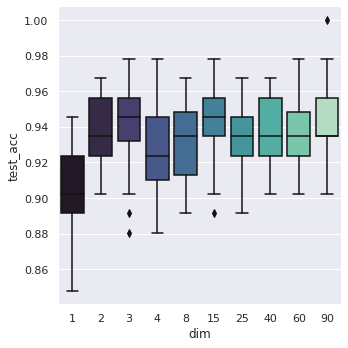

In [183]:
sns.catplot(
    data = acc_df , 
    y = 'test_acc' ,
    x = 'dim' , 
    palette='mako' , 
    kind='box'
)
plt.show()

In [185]:
data = pd.read_csv('processed_data/rf_imp.csv')
data.to_csv()

In [20]:

train_acc = []
test_acc = []
clf = RandomForestClassifier(n_estimators=300 , criterion='entropy' , random_state=2)
temp_df = pd.DataFrame()
for i in range(32):
    df = data.sample(frac=1)
    x = df.drop(['class'] , axis=1)
    y = df['class']
    x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , shuffle=True , random_state=2 , stratify=y)
    clf.fit(x_train , y_train)
    tr = clf.score(x_train , y_train)
    tst = clf.score(x_test , y_test)
    print('\n -----------------')
    print(tr , tst)
    train_acc.append(tr)
    test_acc.append(tst)


NameError: name 'data' is not defined

<AxesSubplot:>

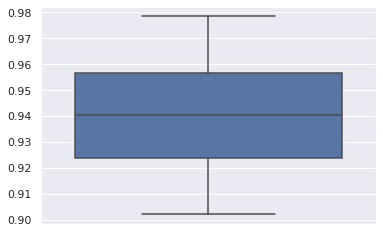

In [187]:
sns.boxplot(y = test_acc)

In [194]:
np.random.seed(348)
df = data.sample(frac=1)
x = df.drop(['class'] , axis=1)
y = df['class']
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , shuffle=True , random_state=2 , stratify=y)
clf.fit(x_train , y_train)
tr = clf.score(x_train , y_train)
tst = clf.score(x_test , y_test)
print(tr , tst)

1.0 0.9456521739130435


In [197]:
prob = clf.predict_proba(x_test)

array([[0.00666667, 0.99333333],
       [0.96666667, 0.03333333],
       [0.        , 1.        ],
       [0.00666667, 0.99333333],
       [0.26333333, 0.73666667],
       [0.65666667, 0.34333333],
       [0.89666667, 0.10333333],
       [0.05666667, 0.94333333],
       [0.00333333, 0.99666667],
       [0.93666667, 0.06333333],
       [0.00666667, 0.99333333],
       [0.01666667, 0.98333333],
       [0.04333333, 0.95666667],
       [0.97333333, 0.02666667],
       [0.88666667, 0.11333333],
       [0.01666667, 0.98333333],
       [0.02      , 0.98      ],
       [0.04      , 0.96      ],
       [0.05333333, 0.94666667],
       [0.61333333, 0.38666667],
       [0.34333333, 0.65666667],
       [0.88      , 0.12      ],
       [0.62      , 0.38      ],
       [0.09333333, 0.90666667],
       [0.76666667, 0.23333333],
       [0.61333333, 0.38666667],
       [0.        , 1.        ],
       [0.03      , 0.97      ],
       [0.96333333, 0.03666667],
       [0.02666667, 0.97333333],
       [0.